## Lab 1 - Basic Numeric Tools

* give a situation that requires finding root of a function.  apply best root finder and solve.
* give a pathological function, look for root.
* code trapezoid rule
* Do 2-2 (first couple of functions?).  First find soln as function of # slices.  Then find "accuracy", using the value found above as "correct" value.  Plot as in Ch. 2 Integration notebook.  Determine how accuracy scales with dx (as quoted in book).
* Whiteboards: show how to use Taylor explansion to find eqn for 3-point and 5-point formulae for derivative.
* write a derivative function that acts on data: calc first and second derivative (e.g. to use * to find vel and accel from position.) (e.g. 2-7&2-8)
* examine difference between 3-pt and 5-pt routines on various functions/data?


In [1]:
from matplotlib import *
import scipy.optimize as opt
from math import *
from numpy import *

## Root Finding

Here are a couple of situations where you can use root finding to find an answer.  Pick an appropriate root finder for each case. In a comment, explain briefly why you chose the one you did. 

#### Mortgage Refinance

People usually borrow money from the bank to buy a house, which is called a mortgage.  When you have a mortgage you pay a fixed amount each month.  Your monthly payment was determined at the beginning of the loan, based on the borrowed amount, the length of time for the loan (eg. the number of payments), and the interest rate.  When interest rates drop during the life of a mortgage, you can "re-finance", which means you essentially borrow money to pay off your existing mortgage.  You then make monthly payments on the new loan. The advantage is that the new payments are lower because the interest rate is lower.  The disadvantage is that you are often charged a flat fee ("closing costs") to make the new loan.  So, the accumulated cost of your current mortgage is your current monthly payment times the number of months:

Cost_old(N) = payment_old * N

while the accumulated cost of the new mortgage would be your new monthly payment times the number of months *plus* the fixed closing cost:

Cost_new(N) = payment_new * N + closing.

Initially, Cost_new will be larger than Cost_old, because of the closing cost.  But over time, the accumulated cost of the new mortgage will be less than teh old mortgage, because of the lower monthly payments.  (Plot each of these functions to convince yourself this is true.)  For the following parameters, find your "break even time", the number of payments at which the new mortgage starts to be less than the old mortgage: 
* Old monthly payment = $ 2,200

* New monthly payment = $ 1,600

* Closing costs = $ 5,000


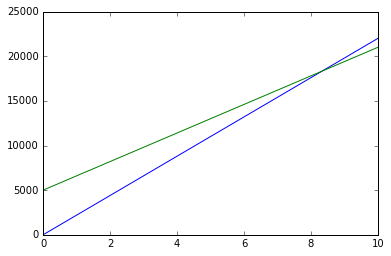

In [14]:
# Solution goes here
x = linspace(0,10,100)
def Cost_old(x):
    y = payment_old * x
    return y
def Cost_new(x):
    y = payment_new * x + closing
    return y
payment_old = 2200
payment_new = 1600
closing = 5000

plot(x,Cost_old(x))
plot(x,Cost_new(x))

In [20]:
def f(x):
    return Cost_old(x)-Cost_new(x)

opt.newton(f,10)

8.333333333333334

#### Vertical drop with air resistance

The vertical distance dropped in the presence of air resistance is given by:

$ y = \frac{v_{term}^2}{g} \ln ( \cosh ( \frac{gt}{v_{term}} )) $

where $ v_{term} = \sqrt{g m / c}$.  For m=50 kg and c ~ 0.25,
find the time to drop 20 meters.

In [37]:
g = 9.8
c = 0.25
m = 50
h = 20

v = sqrt(g*m/c)

def d(t):
    y = (v**2/g)*log(cosh(g*t/v))
    return y

opt.newton(d,20)

3.316840841374061e-08

## Integration

#### Trapezoid Method
Begin by looking at p. 61 in the text.  Show how to get Eq. 2.6 from Eq. 2.5.
Write a function that implements Eq. 2.6 for the trapezoid method of integration.  As in the simple integration, your function should take a list of function values and an interval dx. Test your routine on a function for which you know the integral.

In [77]:
def trapezoid(f,dx):
   
    return dx*sum(f[0:-1])

N = 200
a = 0.0
b = pi

x,interval = linspace(a,b,N,retstep = True)

f = sin(x)

print(trapezoid(f, interval))

1.99995846214


### Comparing Integration methods: Problem 2-2
Do problem 2-2.  It asks you to compare the simple integration, your trapezoid integration, and the built-in Simpson's methods. It asks you to explore the behavior of the method on several functions as you vary the size of dx (or number of steps N).  Probably the best way to do this is to loop over the number of steps, calculate the value of the integral, and plot the results so you can see how they vary with N.  Intuitively, we expect the value of the integral to converge to a value as we increase the number of slices.  The question asks you to determine about how many slices are needed.

Once you've established what the asymptotic value of the integral (e.g. the "true" value), you can do what we showed in class on Wed to plot the accuracy vs. the number of slices. From these plots you can determine how the accuracy depends on N (or dx).

To help you do this, go back to the "Chapter 2 - Integration" notebook and look at the plots of accuracy vs N for the Trapezoid and Simpson's methods.  Which increases accuracy faster?  How fast does each go -- how do we describe them in the text?  Since these are log plots, the slope tells us the *power dependence* of accuracy on N.  That is, a slope of -2 means accuracy goes as $N^{-2}$. With this knowledge, characterize how the accuracy depends on N for each integration method you use here.  Compare to what is written on p. 65 in the text.

In [2]:
from scipy.integrate import simps

In [3]:
#2-2
# Compare results of the simple integration method, trapezoid integration, and Simpson's method
#a)

N=1000
a=0.0
b=pi/2
def int_simple(f,dx):
    return dx*sum(f[0:-1])

x,interval=linspace(a,b,N,retstep=True)
Function = cos(x)
print(int_simple(Function, interval))

#below 10 slices gives innacurate values. The function is curved so it is important to have many slices for accuracy

1.00078597832


In [4]:
trapz(Function,x)

#below 5 slices gives innacurate values.

0.99999979397138195

In [5]:
simps(Function,x)

##below 3 slices gives innacurate values. The shape of the slices follows the function well

0.9999999998379302

In [6]:
#b)
N=1000
a=1.0
b=3
def int_simple(f,dx):
    return dx*sum(f[0:-1])

x,interval=linspace(a,b,N,retstep=True)
Function = 1/x**2
print(int_simple(Function, interval))

#Below 10 slices gives inaccurate values because this function curves rapidly towards zero. 

0.667557088595


In [7]:
trapz(Function,x)
#Below 5 slices gives inaccurate values.

0.66666730992732104

In [8]:
simps(Function,x)
#Below 5 slices gives inaccurate values.

0.66666666869159175

In [9]:
#c)
N=1000
a=2.0
b=4
def int_simple(f,dx):
    return dx*sum(f[0:-1])

x,interval=linspace(a,b,N,retstep=True)
Function = x**2+x+1
print(int_simple(Function, interval))

#This function starts to get innacurate below 10 as well because it is curving upward exponentially and requires many
#slices to keep up with the curve

26.6526539887


In [10]:
trapz(Function,x)

#This function starts to get innacurate below 4. The shape of the slices follows the function well

26.666668002670669

In [11]:
simps(Function,x)

#This function starts to get innacurate below 3. The shape of the slices follows the function well

26.666666668004009

In [12]:
#d)
N=1000
a=0.0
b=6.9
def int_simple(f,dx):
    return dx*sum(f[0:-1])

x,interval=linspace(a,b,N,retstep=True)
Function = cos((pi/2)*x**2)
print(int_simple(Function, interval))

#Below 50 this function becomes innacurate.This function oscillates rapidly
#This means the peaks must be captured by the slices

0.473902896382


In [13]:
trapz(Function,x)

#Below 50 this function becomes innacurate. This function oscillates rapidly
#This means the peaks must be captured by the slices

0.47327488489520025

In [14]:
simps(Function,x)

#Below 46 this function becomes innacurate. The # should be even for accuracy as well. This function oscillates rapidly
#This means the peaks must be captured by the slices

0.47322027994855287

## Differentiation

#### Deriving the 3-point and 5-point relations for derivative
a. On a whiteboard, write the Taylor expansion for a function $f(x)$ around $x_0$.  

b. To turn this into a discrete expression, useful for working with datapoints, think of $x_0$ as $x_i$ and $x$ as $x_{i+1}$, the next value of x in the discrete set.  Translate your expression for the Taylor expansion into this notation, and simplify it using $\Delta x = x_{i+1}-x_i$.

c. Solve this expression for $f^{\prime}$. Ignoring the terms is $\Delta x$ and higer, this is the first order approximation to the derivative. The error we're making is all those terms we ignored, which is on the order of $\Delta x$.

d. To do better, write out the Taylor expansion in discrete form for $f(x_{i-1})$.  What you are doing now is thinking about the point *before* $x_i$. ($x_i$ is still $x_0$).

e. Now, **subtract** your Taylor explansion for $f(x_{i-1})$ from the one for $f(x_{i+1})$.  Solve this expression for $f^{\prime}$.  Now the biggest error term is proportional to $\Delta x^2$. This is the "3-point derivative" formula.  (Why "3-point"?).

f. To find the "5-point derivative" formula, consider the Taylor expansion for $f(x_{i\pm 2})$, subtracting one from the other. See page 67 for the final steps, but do them on your whiteboard and confirm the final result. 

g. What's the advantage of the 5-point over the 3-point method?  What's a disadvantage, especially when acting on data?

#### Implementing the 3-point derivative method

(Problem 2-7) Write a function that, given a list of function values $f_i$ and the spacing
$dx$ between them, returns a list of values of the first derivative of the
function. Test your function by giving it a list of known function values
for $\sin(x)$ and making a graph of the differences between the output
of the function and $\cos(x)$.

(Problem 2-8) Write a function that, given a list of function values $f_i$ and the spacing
$dx$ between them, returns a list of values of the second derivative of the
function. Test your function by giving it a list of known function values
for $\sin(x)$ and making a graph of the differences between the output
of the function and $-\sin(x)$.

Use your two derivative functions to calculate velocity and acceleration from a list of time and position values (for example, from the motion detector in LoggerPro.)